In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load audio with librosa (returns float32 and resamples to 22050 by default)
audio, sample_rate = librosa.load("audio_MNIST_six_only/6_01_0.wav", sr=6800)
print(f"Sample rate: {sample_rate} Hz")
print(f"Audio duration: {len(audio) / sample_rate:.2f} seconds")

Sample rate: 6800 Hz
Audio duration: 0.75 seconds


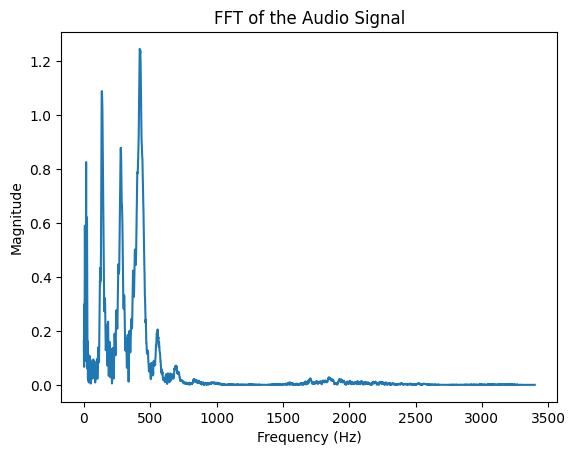

In [32]:
# denoise the signal by applying centered moving average
window_size = 5
denoised_audio = np.convolve(audio, np.ones(window_size)/window_size, mode='valid')
# Apply FFT
fft_result = np.fft.fft(denoised_audio)
frequencies = np.fft.fftfreq(len(fft_result), 1 / sample_rate)

# Take only the positive frequencies
magnitude = np.abs(fft_result)[:len(fft_result)//2]
frequencies = frequencies[:len(frequencies)//2]

# Plot
plt.plot(frequencies, magnitude)
plt.title("FFT of the Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

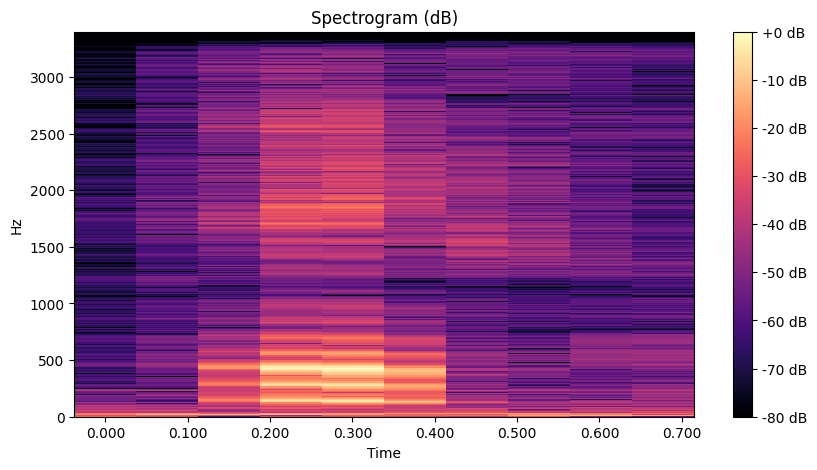

In [33]:
# Compute STFT
D = librosa.stft(audio)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.show()